In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ejercicio 11

In [479]:
def minimos_cuadrados_fs(xs,ys,fs):
    A = np.zeros((len(xs), len(fs)))
    b = np.array(ys)
    
    for j, fj in enumerate(fs):
        for i, xi in enumerate(xs):
            A[i][j] = fj(xi)

    coefs = np.linalg.solve(A.T@A, A.T@b)
    
    def model(x):
        return sum([a*f(x) for (a, f) in zip(coefs, fs)])       
    
    error = sum([(model(x) - y)**2 for (x, y) in zip(xs,ys)])
    return model, error, (A, coefs)

In [480]:
def constant(x):
    return 1

def polynomial(n):
    def f(x):
        return x**n
    return f

def sin_offset(t):
    def f(x):
        return np.sin(x*t)
    return f

def cos_offset(t):
    def f(x):
        return np.cos(x*t)
    return f

In [481]:
datos_humedad = pd.read_csv("humedad.csv")
ts = datos_humedad["t"].tolist()
humedades = datos_humedad["humedad"].tolist()

In [482]:
# Es interesante cambiar la frecuencia del coseno.
# Por ejemplo, si le pongo 3 aproxima mejor.

In [483]:
fs=[constant, sin_offset((2*np.pi)/366), cos_offset((4*np.pi)/366)]
modelo_tiempo, error, (A, coefs) = minimos_cuadrados_fs(ts,humedades,fs)

In [484]:
print("El error total es", error)

El error total es 729.2707839648951


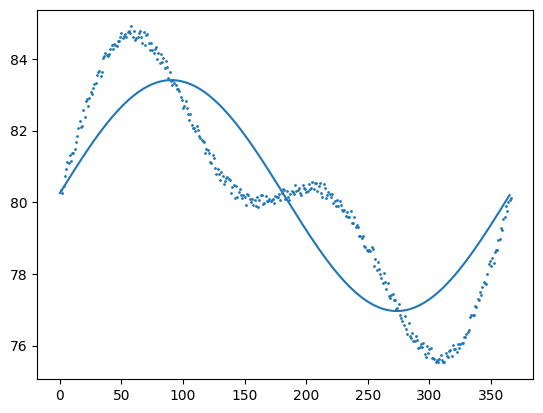

In [485]:
ajuste = [modelo_tiempo(t) for t in ts]
plt.scatter(xs, ys, s=1)
plt.plot(ajuste)

## Ejercicio 12

In [486]:
datos = pd.read_csv("infantes.csv")

In [487]:
Y = datos["headcirc"].tolist()
X1 = datos["gestage"].tolist()
X2 = datos["birthwt"].tolist()

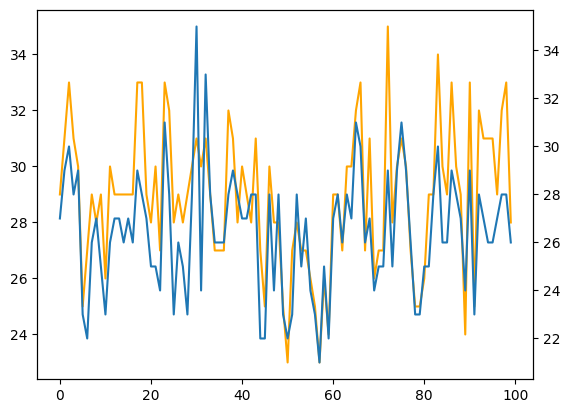

In [488]:
# Edad de gestacion vs Parametro cefalico 
fig, ax1 = plt.subplots()
ax1.plot(X1, color="orange")

ax2 = ax1.twinx()  
ax2.plot(Y)

plt.show()

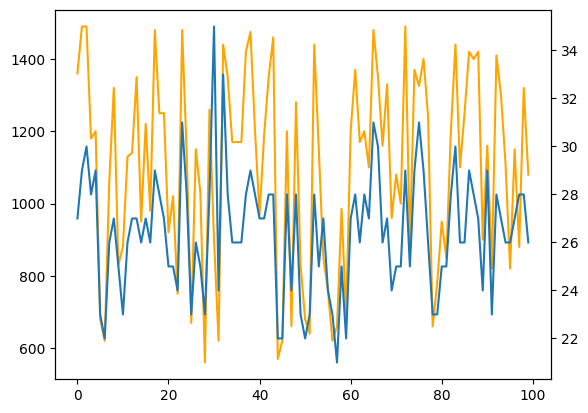

In [489]:
# Peso al nacer vs Parametro cefalico 
fig, ax1 = plt.subplots()
ax1.plot(X2, color="orange")

ax2 = ax1.twinx()  
ax2.plot(Y)

plt.show()


In [490]:
def regresion_lineal(X,Y):
    A = np.array(X).T
    b = np.array(Y)

    coefs = np.linalg.solve(A.T@A, A.T@b)
    
    def model(x):
        return sum([a*var for a, var in zip(coefs, x)])
    
    error = sum([(model(x) - y)**2 for x, y in zip(A, Y)])
    
    return model, error, coefs

Los coeficientes son [0.91451741]
El error es de 259.4656892471968


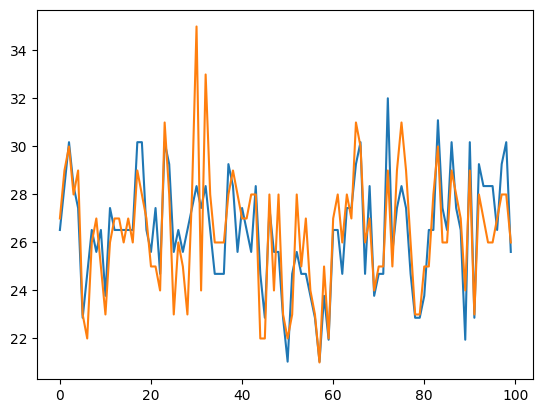

In [491]:
columns = [X1]
model, error, coefs = regresion_lineal(columns, Y)
print("Los coeficientes son", coefs)
print("El error es de", error)
plt.plot([model(x) for x in zip(*columns)])
plt.plot(Y)

Los coeficientes son [0.78151794 0.00347442]
El error es de 202.35537159403543


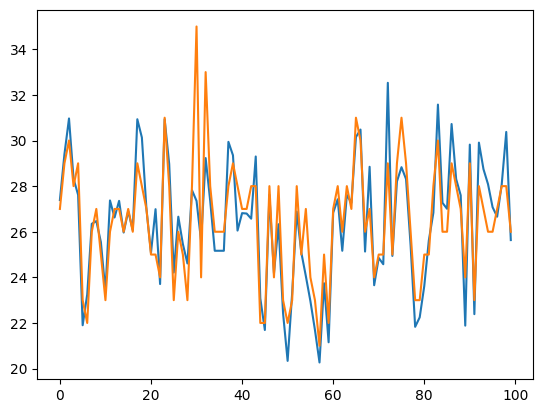

In [492]:
columns = [X1, X2]
model, error, coefs = regresion_lineal(columns, Y)
print("Los coeficientes son", coefs)
print("El error es de", error)
plt.plot([model(x) for x in zip(*columns)])
plt.plot(Y)

In [496]:
diff = model([1,20]) - model([1,10])
print("Un incremento en 10 gramos representa 0.03 centimetros mas de perimetro cefalico")

0.03474417427709209